# Mushroom Classification

This homework is a classification task to identify whether a mushroom is edible or poisonous. 
  
This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). 
  
Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the credibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.  
  
![](https://projectsbasedlearning.com/wp-content/uploads/2021/02/Mushroom-Classification-1.png)

__Data Set Information:__ https://archive.ics.uci.edu/ml/datasets/mushroom

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Load "ModifiedEdibleMushroom.csv" data from the link

In [ ]:
!wget https://github.com/kaopanboonyuen/Python-Data-Science/raw/master/Dataset/hed2020_dataset.csv

In [3]:
df = pd.read_csv("hed2020_dataset.csv")
df.head()

id label cap-shape cap-surface bruises odor gill-attachment gill-spacing  \
0   1     p         x           s       t    p               f            c   
1   2     e         x           s       t    a               f            c   
2   3     e         b           s       t    l               f            c   
3   4     p         x           y       t    p               f            c   
4   5     e         x           s       f    n               f            w   

  gill-size stalk-shape  ... ring-number ring-type spore-print-color  \
0         n           e  ...           o         p                 k   
1         b           e  ...           o         p                 n   
2         b           e  ...           o         p                 n   
3         n           e  ...           o         p                 k   
4         b           t  ...           o         e                 n   

  population habitat cap-color-rate gill-color-rate veil-color-rate  \
0          s       u            1.0             3.0             1.0   
1          n       g            2.0             3.0             1.0   
2          n       m            3.0             1.0             1.0   
3          s       u            3.0             1.0             1.0   
4          a       g            4.0             3.0             1.0   

  stalk-color-above-ring-rate  stalk-color-below-ring-rate  
0                         1.0                          1.0  
1                         1.0                          1.0  
2                         1.0                          1.0  
3                         1.0                          1.0  
4                         1.0                          1.0  

[5 rows x 24 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           5824 non-null   int64  
 1   label                        5764 non-null   object 
 2   cap-shape                    5824 non-null   object 
 3   cap-surface                  5797 non-null   object 
 4   bruises                      5725 non-null   object 
 5   odor                         5725 non-null   object 
 6   gill-attachment              5725 non-null   object 
 7   gill-spacing                 5694 non-null   object 
 8   gill-size                    5703 non-null   object 
 9   stalk-shape                  5703 non-null   object 
 10  stalk-root                   5793 non-null   object 
 11  stalk-surface-above-ring     5793 non-null   object 
 12  stalk-surface-below-ring     5793 non-null   object 
 13  veil-type         

In [5]:
row, column = df.shape
print(f"There are {row} rows and {column} columns.")

# Question 1: how many "na" are there in "gill-size" variables?
gill_size_na = df['gill-size'].isna().sum()
print(f"There are {gill_size_na} na in variables gill-size.")

There are 5824 rows and 24 columns.
There are 121 na in variables gill-size.


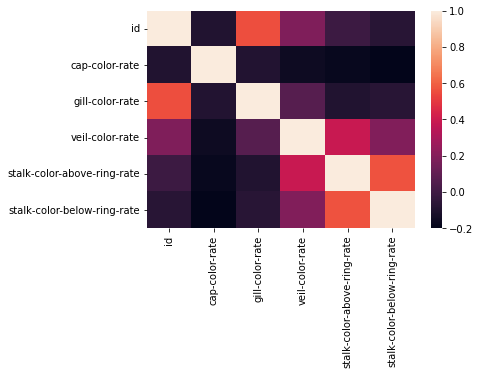

In [6]:
sns.heatmap(df.corr())
plt.show()

## 2. Drop rows where the target (label) variable is missing


In [7]:
df.dropna(subset=['label'], inplace=True)
print(f"There are {df.shape[0]} rows left.")

There are 5764 rows left.


## 3. Drop the following variables

In [8]:
dropped_cols = [
    'gill-attachment', 'gill-spacing', 'gill-size','gill-color-rate', 'stalk-root', 
    'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring-rate',
    'stalk-color-below-ring-rate', 'veil-color-rate', 'veil-type'
]

# Remove all of the following variables in columns
df.drop(dropped_cols, axis=1, inplace=True)

# Display remaining columns
print(f"There are {df.shape[1]} columns left.")

There are 13 columns left.


## 4. Examine the number of rows, the number of digits, and whether any are missing


In [9]:
# Question 2: how many rows of data, how many variables?
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

# number of digits
digit_counts = df.count(axis=0, numeric_only=True)
print(f"\nNumber of digits:\n{digit_counts}")

# number of missing values
null_counts = df.isnull().sum()
print(f"\nNumber of null values in each column before imputing:\n{null_counts}")

There are 5764 rows and 13 columns.

Number of digits:
id                5764
cap-color-rate    5737
dtype: int64

Number of null values in each column before imputing:
id                     0
label                  0
cap-shape              0
cap-surface           27
bruises               99
odor                  99
stalk-shape          121
ring-number           62
ring-type             62
spore-print-color     56
population            56
habitat               31
cap-color-rate        27
dtype: int64


## 5. Fill missing values by adding the mean for numeric variables and the mode for nominal variables

In [10]:
# impute missing value with mean values
numeric_cols = df.select_dtypes(include=np.number).columns
df.fillna(df[numeric_cols].mean(), inplace=True)

# impute missing value with mode values
object_cols = df.select_dtypes(exclude=np.number).columns
df.fillna(df[object_cols].mode().iloc[0], inplace=True)

df.head()

id label cap-shape cap-surface bruises odor stalk-shape ring-number  \
0   1     p         x           s       t    p           e           o   
1   2     e         x           s       t    a           e           o   
2   3     e         b           s       t    l           e           o   
3   4     p         x           y       t    p           e           o   
4   5     e         x           s       f    n           t           o   

  ring-type spore-print-color population habitat  cap-color-rate  
0         p                 k          s       u             1.0  
1         p                 n          n       g             2.0  
2         p                 n          n       m             3.0  
3         p                 k          s       u             3.0  
4         e                 n          a       g             4.0

In [11]:
null_counts = df.isnull().sum()
print(f"Number of null values in each column after imputing:\n{null_counts}")

Number of null values in each column after imputing:
id                   0
label                0
cap-shape            0
cap-surface          0
bruises              0
odor                 0
stalk-shape          0
ring-number          0
ring-type            0
spore-print-color    0
population           0
habitat              0
cap-color-rate       0
dtype: int64


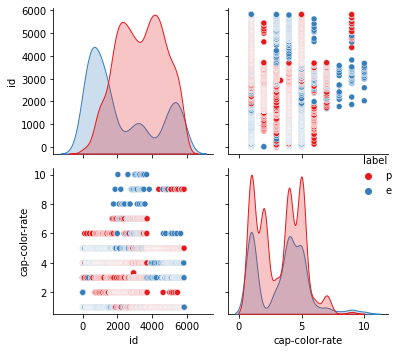

In [12]:
sns.pairplot(df, hue='label', palette='Set1')
plt.tight_layout()
plt.show()

## 6. Convert the label variable edible to 1 and poisonous to 0, then check the quantity (class0 : class1)

In [13]:
from sklearn.preprocessing import OneHotEncoder

# One-hot Encoding
encoder = OneHotEncoder()

# df['label'].apply(lambda x: 1 if (x == 'e') else 0)
transformed = encoder.fit_transform(df[['label']])

# Transform label to binary (0/1)
y_converted = transformed.toarray()
df['label'] = y_converted
df.head()

id  label cap-shape cap-surface bruises odor stalk-shape ring-number  \
0   1    0.0         x           s       t    p           e           o   
1   2    1.0         x           s       t    a           e           o   
2   3    1.0         b           s       t    l           e           o   
3   4    0.0         x           y       t    p           e           o   
4   5    1.0         x           s       f    n           t           o   

  ring-type spore-print-color population habitat  cap-color-rate  
0         p                 k          s       u             1.0  
1         p                 n          n       g             2.0  
2         p                 n          n       m             3.0  
3         p                 k          s       u             3.0  
4         e                 n          a       g             4.0

In [14]:
# Question 3: quantity (class 0 : class 1)
df['label'].value_counts()

0.0    3660
1.0    2104
Name: label, dtype: int64

## 7. Convert the nominal variable to numeric using a dummy code with drop_first = True

A nominal variable is a type of variable that is used to name, label or categorize particular attributes that are being measured. It takes qualitative values representing different categories, and there is no intrinsic ordering of these categories.

In [15]:
# For the variables “nominal”, dummy coding and drop the first level
object_cols = df.select_dtypes(exclude=np.number).columns
dummy_df = pd.get_dummies(df[object_cols], drop_first=True)

# Add these dummy columns back to the original DataFrame
filtered_with_dummy_df = pd.concat([df, dummy_df], axis=1)
filtered_with_dummy_df = filtered_with_dummy_df.drop(object_cols, axis=1)

# Display remaining columns after concat with original DataFrame
print(f"There are {filtered_with_dummy_df.shape[1]} columns.")

There are 44 columns.


## 8. Split train/test with 20% test, stratify, and seed = 2020

In [16]:
from sklearn.model_selection import train_test_split

y = filtered_with_dummy_df.pop('label')
x = filtered_with_dummy_df

# random_state = Controls the shuffling applied to the data before applying the split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, stratify=y, test_size=0.2, random_state=2020
)

# Display Total Proportion
poison_total, edible_total = y.value_counts().sort_index().tolist()
print(f"Proportion in total data\n{'-' * 15}")
print(f"poison = {poison_total:5}")
print(f"edible = {edible_total:5}")
print(f"ratio  = {poison_total / edible_total:5.2f}")

# Display Train Proportion
poison_train, edible_train = y_train.value_counts().sort_index().tolist()
print(f"\nProportion in train data\n{'-' * 15}")
print(f"poison = {poison_train:5}")
print(f"edible = {edible_train:5}")
print(f"ratio  = {poison_train / edible_train:5.2f}")

# Display Test Proportion
poison_test, edible_test = y_test.value_counts().sort_index().tolist()
print(f"\nProportion in test data\n{'-' * 15}")
print(f"poison = {poison_test:5}")
print(f"edible = {edible_test:5}")
print(f"ratio  = {poison_test / edible_test:5.2f}")

Proportion in total data
---------------
poison =  3660
edible =  2104
ratio  =  1.74

Proportion in train data
---------------
poison =  2928
edible =  1683
ratio  =  1.74

Proportion in test data
---------------
poison =   732
edible =   421
ratio  =  1.74


In [17]:
# Question 4: how much is each training and testing sets?
print(f"Training set = {poison_train + edible_train}")
print(f"Testing set  = {poison_test + edible_test}")

Training set = 4611
Testing set  = 1153


## 9. Create a Random Forest with GridSearch on training data with 5 CV

- ​'criterion':['gini','entropy']
- 'max_depth': [2,3,6]
- 'min_samples_leaf':[2,5,10]
- 'N_estimators':[100,200]
- 'random_state': 2020

In [26]:
import time
from datetime import timedelta
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

grid_search = GridSearchCV(
    estimator = RandomForestClassifier(random_state=2020),
    param_grid = {
        'criterion'        : ['gini', 'entropy'],
        'max_depth'        : [2, 3, 6],
        'min_samples_leaf' : [2, 5, 10],
        'n_estimators'     : [100, 200],
    },

    scoring = 'accuracy',       # Strategy to evaluate the performance on test set
    cv      =  5,               # Cross-validation splitting strategy (5-fold cross validation)
    n_jobs  = -1                # Number of jobs to run in parallel (-1 mean all processors)
)

# Find best trained model from
grid_start_time = time.time()
grid_search.fit(x_train, y_train)
grid_end_time = time.time()

time_used = timedelta(seconds=grid_end_time - grid_start_time)
print(f"Searching Time: {str(time_used).split('.')[0]}")

Searching Time: 0:00:49


In [27]:
# Best Trained Model 
model = grid_search.best_estimator_

In [28]:
from sklearn.feature_selection import SelectFromModel

# Question 5: best params after doing random forest grid search?
selector = SelectFromModel(estimator=model)
selector.get_params()['estimator']

RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=2,
                       n_estimators=200, random_state=2020)

## 10. Predict the testing data set with confusion_matrix and classification_report

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict with the best model
predictions = model.predict(x_test)

# Question 6: What is the value of macro f1?
print(classification_report(y_test, predictions, digits=4))
print(confusion_matrix(y_test, predictions, labels=[0, 1]))

              precision    recall  f1-score   support

         0.0     0.9986    0.9986    0.9986       732
         1.0     0.9976    0.9976    0.9976       421

    accuracy                         0.9983      1153
   macro avg     0.9981    0.9981    0.9981      1153
weighted avg     0.9983    0.9983    0.9983      1153

[[731   1]
 [  1 420]]


In [33]:
from sklearn.tree import export_graphviz

# Extract single tree
estimator = model.estimators_[5]

# Export as dot file
export_graphviz(
    estimator, out_file='tree.dot', 
    feature_names = x.columns,
    class_names = ['poison', 'edible'],
    rounded = True, proportion = False, 
    precision = 2, filled = True
)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')